## step1: Import Libries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## step 2: Create the Dataset

In [ ]:
np.random.rand()

range(0, 1000)

In [21]:
# Set random seed for reproducibility
np.random.seed(29)

# Create a synthetic dataset
data = {
    'product_id': range(1,21),
    'product_name': [f'Product {i}' for i in range(1,21)],
    'category': np.random.choice(['Electronics','Clothing','Home','Sports'],20),
    'units_sold': np.random.poisson(lam=20, size=20),
    'sale_date': pd.date_range(start='2023-01-05', periods=20, freq='D')
}

sales_data = pd.DataFrame(data)

# Display the first few rows of dataset
print("Sales Data: ")
print(sales_data)


Sales Data: 
    product_id product_name     category  units_sold  sale_date
0            1    Product 1     Clothing          16 2023-01-05
1            2    Product 2       Sports          11 2023-01-06
2            3    Product 3  Electronics          21 2023-01-07
3            4    Product 4     Clothing          17 2023-01-08
4            5    Product 5         Home          20 2023-01-09
5            6    Product 6  Electronics          23 2023-01-10
6            7    Product 7  Electronics          24 2023-01-11
7            8    Product 8     Clothing          14 2023-01-12
8            9    Product 9     Clothing          20 2023-01-13
9           10   Product 10  Electronics          12 2023-01-14
10          11   Product 11     Clothing          20 2023-01-15
11          12   Product 12       Sports          19 2023-01-16
12          13   Product 13     Clothing          20 2023-01-17
13          14   Product 14         Home          24 2023-01-18
14          15   Product 15

In [22]:
# Save the DataFrame as a CSV file
sales_data.to_csv('sales_data.csv', index=False)

In [23]:
# Path location
import os
os.getcwd()

'c:\\Users\\91837\\DSPrakashSenapathi\\3_statistics\\4_projects\\stats_practice'

## step 3: Descriptive Statistics

In [24]:
# Descriptive statistics
descriptive_stats = sales_data['units_sold'].describe()

# Display descriptive statistics
print("\nDescriptive Statistics for units sold:")
print(descriptive_stats)

# Additional statistics
mean_sales=sales_data.units_sold.mean()
median_sales=sales_data.units_sold.median()
mode_sales=sales_data.units_sold.mode()[0]
variance_sales=sales_data.units_sold.var()
standard_dev_sales=sales_data.units_sold.std()

# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['Category', 'Total unit sold','Average units sold','Std dev of units sold']

# Display the results
print("\nstatistical Analysis:")
print(f"Mean units sold: {mean_sales}")
print(f"Median units sold: {median_sales}")
print(f"Mode units sold: {mode_sales}")
print(f"Variance units sold: {variance_sales}")
print(f"Standard Deviation units sold: {standard_dev_sales}")
print("\nCategorical Satatistics:")
print(category_stats)


Descriptive Statistics for units sold:
count    20.000000
mean     18.850000
std       4.029823
min      11.000000
25%      16.750000
50%      20.000000
75%      21.000000
max      26.000000
Name: units_sold, dtype: float64

statistical Analysis:
Mean units sold: 18.85
Median units sold: 20.0
Mode units sold: 20
Variance units sold: 16.239473684210527
Standard Deviation units sold: 4.029823033857756

Categorical Satatistics:
      Category  Total unit sold  Average units sold  Std dev of units sold
0     Clothing              145           18.125000               2.295181
1  Electronics              106           21.200000               5.449771
2         Home               61           20.333333               3.511885
3       Sports               65           16.250000               4.573474


## Step 4: Infrential Statistics

In [38]:
# Confidence Interval for the mean of units sold
confidence_level = 0.99
degree_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = standard_dev_sales / np.sqrt(len(sales_data['units_sold']))

# t-score for teh confidence level 
t_score = stats.t.ppf((1+confidence_level)/2, degree_freedom)
margin_of_error = t_score*standard_dev_sales

confidence_interval = (sample_mean -margin_of_error,sample_mean+margin_of_error)
print("\nConfidence Interval for the mean of units sold:")
print(confidence_interval)


Confidence Interval for the mean of units sold:
(7.320939824567363, 30.37906017543264)


## Hypothesis Testing 

In [44]:
# Hypothesis Test (t-test)
# Null hypothesis : mean units sold  equal to 20
# Alternate hypothesis: Mean units sold is not equal to 20

t_statistic, p_values = stats.ttest_1samp(sales_data['units_sold'], 20)

print("\nHypothesis Testing (t-test):")
print(f"T-statistic: {t_statistic}, p-value: {p_values}")

if p_values<0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20")


Hypothesis Testing (t-test):
T-statistic: -1.2762238701400614, p-value: 0.21725684064030215
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20


## step 5: Visualizations


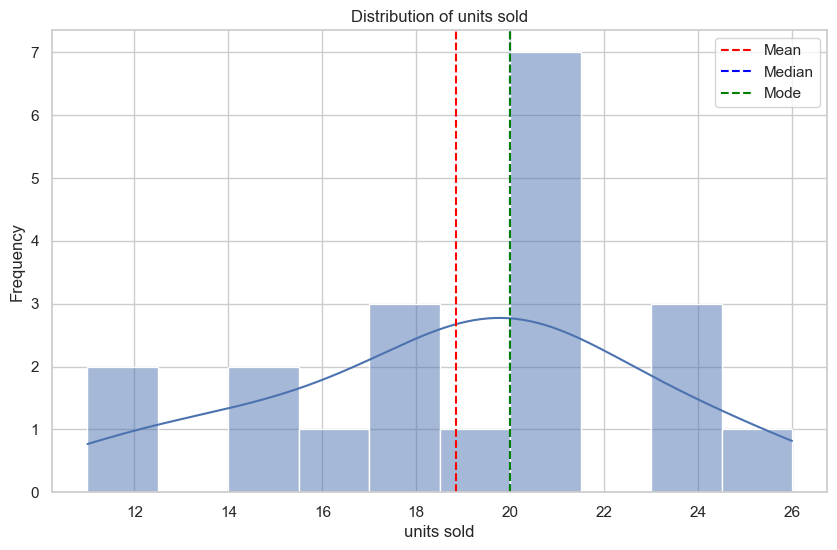

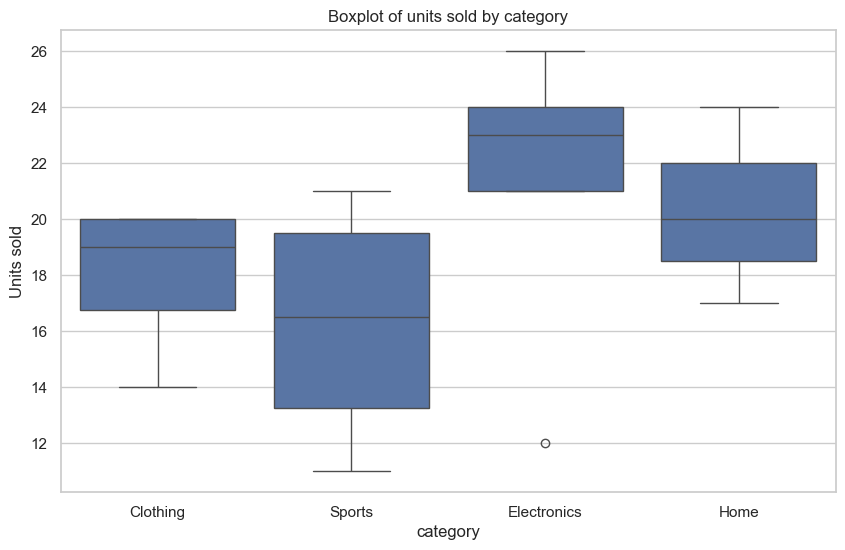

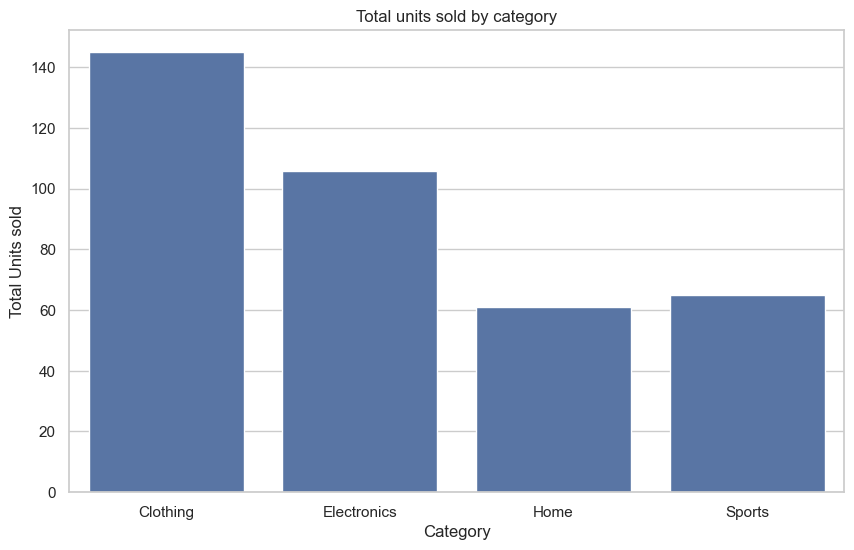

In [48]:
# Visualizations
sns.set(style="whitegrid")

# Plot distribution of units sold
plt.figure(figsize=(10, 6))
sns.histplot(sales_data["units_sold"],bins=10,kde=True)
plt.title("Distribution of units sold")
plt.xlabel("units sold")
plt.ylabel("Frequency")
plt.axvline(mean_sales, color='red',linestyle = '--',label='Mean')
plt.axvline(median_sales, color='blue',linestyle = '--',label='Median')
plt.axvline(mode_sales, color='green',linestyle = '--',label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category',y='units_sold', data=sales_data)
plt.title("Boxplot of units sold by category")
plt.xlabel("category")
plt.ylabel("Units sold")
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category',y='Total unit sold', data=category_stats)
plt.title("Total units sold by category")
plt.xlabel("Category")
plt.ylabel("Total Units sold")
plt.show()